<a href="https://colab.research.google.com/github/patel7147/ROYAL_DL/blob/master/PCA_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PCA Working:**

1)Preprocessing/Normalizing.

2)Calculate the co-variance matrix X of data points.

3)Calculate the eigen vectors and corresponding eigen values.

4)Sort the eigen vectors according to their eigen values in the decreasing order.

5)Choose first k eigen vectors and that will be the new k dimensions.

6)Transform the original n dimensional data into k dimension. 

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt

In [2]:
air_data = pd.read_excel('/content/AirQualityUCI.xlsx')
air_data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [23]:
air_data = air_data[air_data['NMHC(GT)']!=-200]
air_data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,2004-04-30,20:00:00,4.4,1449.25,501,19.494597,1282.25,254.0,625.00,133.0,2099.50,1568.50,19.075,61.075001,1.334500
1227,2004-04-30,21:00:00,3.1,1362.50,234,15.100351,1151.75,189.0,683.75,110.0,1951.25,1494.75,18.200,65.350002,1.352888
1228,2004-04-30,22:00:00,3.0,1371.25,212,14.594739,1135.75,174.0,689.00,102.0,1926.75,1471.25,18.075,66.100000,1.357869
1229,2004-04-30,23:00:00,3.1,1406.25,275,13.697100,1106.75,167.0,718.25,108.0,1871.50,1383.75,17.700,66.875000,1.342218


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=air_data.drop(['Date', 'Time','AH'], axis=1)
X=scaler.fit_transform(X)

In [25]:
Y=air_data.AH
print(Y)

0       0.757754
1       0.725487
2       0.750239
3       0.786713
4       0.788794
          ...   
1226    1.334500
1227    1.352888
1228    1.357869
1229    1.342218
1230    1.345960
Name: AH, Length: 912, dtype: float64


In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)

In [61]:
pca.get_covariance()

array([[ 0.00739022,  0.0028645 ,  0.00573477, -0.00011231,  0.00419678,
         0.00553506, -0.0051716 ,  0.00499613,  0.00274939,  0.0045306 ,
        -0.00093953, -0.00163326],
       [ 0.0028645 ,  0.02679096,  0.01463587,  0.0183623 ,  0.02333739,
         0.01245137, -0.00139712,  0.0104148 ,  0.02066447,  0.02255453,
         0.01725236,  0.01497175],
       [ 0.00573477,  0.01463587,  0.02754269,  0.00470986,  0.01939643,
         0.02053414, -0.01636663,  0.0183078 ,  0.01418741,  0.02021242,
         0.00184782, -0.00092412],
       [-0.00011231,  0.0183623 ,  0.00470986,  0.02750549,  0.0182123 ,
         0.00258734,  0.00955323,  0.00137158,  0.01821755,  0.01657473,
         0.02220718,  0.0210409 ],
       [ 0.00419678,  0.02333739,  0.01939643,  0.0182123 ,  0.03257256,
         0.01705124, -0.0057261 ,  0.0145693 ,  0.02290525,  0.02628201,
         0.01641262,  0.01355768],
       [ 0.00553506,  0.01245137,  0.02053414,  0.00258734,  0.01705124,
         0.02534032, -

In [62]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.52513433, 0.28779624])

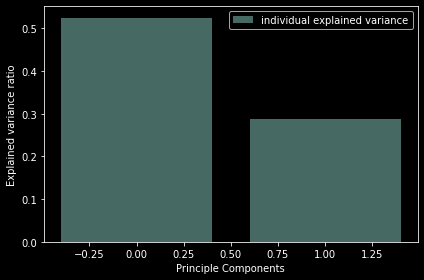

In [63]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(6,4))
  plt.bar(range(2), explained_variance, alpha=0.5, align = 'center', label = 'individual explained variance')
  plt.ylabel('Explained variance ratio')
  plt.xlabel('Principle Components')
  plt.legend(loc='best')
  plt.tight_layout()

In [64]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, Y, test_size = 0.3, random_state=2)
print(X_train_new.shape)
print(X_test_new.shape)
print(y_train.shape)
print(y_test.shape)

(638, 2)
(274, 2)
(638,)
(274,)


In [66]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()

model.add(Dense(300,input_shape=(2,),activation='relu'))

model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='linear'))

model.compile(Adam(lr=0.01),'mean_squared_error')

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 300)               900       
_________________________________________________________________
dense_31 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_32 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_33 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 21        
Total params: 37,091
Trainable params: 37,091
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.fit(X_train_new,y_train,epochs=100)

Epoch 1/100
20/20 [==============================] - 0s 2ms/step - loss: 999.6198
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 55.6866
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 3.5745
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 1.6411
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8011
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0834
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1056
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3497
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3839
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0803
Epoch 11/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0521
Epoch 12/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4567
Epoch 13/100
20/20 [==============

In [68]:
result_pca = model.evaluate(X_test_new, y_test)
print(result_pca)
accuracy_pca = 1 - result_pca
print("Accuracy : {}".format(accuracy_pca))

9/9 [==============================] - 0s 2ms/step - loss: 0.0193
0.019287845119833946
Accuracy : 0.980712154880166


**Output:**

11 Components : Accuracy : 0.9949425160884857

8 Components : Accuracy : 0.9931207960471511

6 Components : Accuracy : 0.9151405245065689

4 Components : Accuracy : 0.7933223694562912

2 Components : Accuracy : 0.980712154880166